In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
train_df = pd.read_csv(Path('Resources/2019loans.csv'))
test_df = pd.read_csv(Path('Resources/2020Q1loans.csv'))

In [3]:
# Converting categorical data to numeric and separating target feature for training data

X = train_df.drop(columns= "loan_status")
X_train = pd.get_dummies(X)
y_train = train_df.loan_status

In [4]:
# Converting categorical data to numeric and separating target feature for testing data
X_test = pd.get_dummies(test_df.drop(columns='loan_status'))
y_test = test_df.loan_status

In [5]:
# Adding missing dummy variables to testing set
set(X_train.columns)-set(X_test.columns)

X_test['debt_settlement_flag_Y'] = 0

In [6]:
len(X_train)

12180

In [7]:
# Training the Logistic Regression model on the unscaled data and printing the model score
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=42, max_iter=13000).fit(X_train,y_train)

Model Prediction:

The scores are lower in general than what I suspected they would be. I'm of the opinion that both models will preform well (around .7). Both models should do better at predictions once the data is scaled. I suspect LR will have the greatest increase overall. 

In [8]:
LR.score(X_test,y_test)

0.5648660144619311

In [9]:
# Training a Random Forest Classifier model and printing the model score
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train, y_train)
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

Training Score: 1.0
Testing Score: 0.6180348787749894


In [10]:
# Scaling the data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Training the Logistic Regression model on the scaled data and printing the model score
LR = LogisticRegression(random_state=42, max_iter=13000).fit(X_train_scaled,y_train)
LR.score(X_test_scaled, y_test)

0.719906422798809

In [12]:
# Training a Random Forest Classifier model on the scaled data and printing the model score
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.6193109315185028


Initial LR Score: 0.5648660144619311
Scaled LR Score: 0.719906422798809

Initial RandomForest: 0.6180348787749894
Scaled RandomForest: 0.6193109315185028

Scaled Testing Results:
The LR benefited the most from scaling. Which is in line with excpectations. RandomForest takes a slice and makes predictions based off of it. Scaling wouldn't nessecarily effect the slice thats being tested. Linear Regressions work exactly on a linear scale meaning an increase would make the trend increase comparatively. 

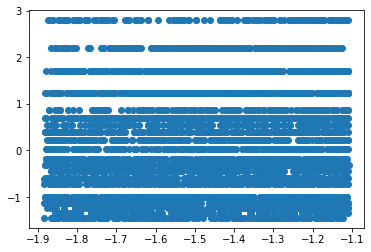

In [19]:
import matplotlib.pyplot as plt
labels = LR.predict(X_test_scaled)
plt.scatter(X_test_scaled[:,0], X_test_scaled[:,3])

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not ['low_risk' 'low_risk' 'low_risk' ... 'high_risk' 'low_risk' 'high_risk']

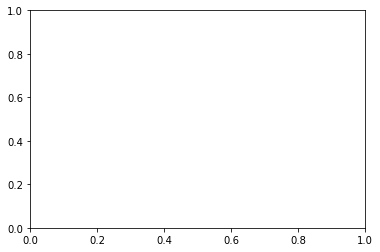

In [17]:
labels = clf.predict(X_test_scaled)
plt.scatter(X_test_scaled[:,0], X_test_scaled[:,3], c=labels)